In [1]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing_data_df = pd.read_csv('data/kc_house_data.csv')
housing_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
feature_col = np.array(housing_data_df['sqft_lot'])
target_col = housing_data_df.price.to_numpy()

In [4]:

size_log = np.log(feature_col)
price_log = np.log(target_col)

In [5]:

def linear_regression(intercept, slope, features):
    return intercept + (slope * features)

In [6]:

def loss_function(intercept, slope, loss_type, targets=price_log, features=size_log):
    predictions = linear_regression(intercept, slope, features)
    if loss_type == 'mse':
        loss_value = tf.keras.losses.mse(targets, predictions)
    elif loss_type == 'mae':
        loss_value = tf.keras.losses.mae(targets, predictions)
    return loss_value

In [7]:

# run optimisation step

def optimisation(intercept, slope, num_opt = 100, opt = tf.optimizers.Adam(0.5)):

    for i in range(num_opt):
        # minimise loss
        opt.minimize(lambda: loss_function(intercept, slope, 'mae'), var_list=[intercept, slope])

        if i%10 == 0:
            print("Loss "+str(i)+": "+str(loss_function(intercept, slope, 'mae').numpy()))
            
    print("Optimal intercept:", intercept.numpy())
    print("Optimal slope:", slope.numpy())

In [8]:

def plot_results(intercept, slope, num_opt = 100):
    size_range = np.linspace(6,14,num_opt)
    price_pred = [intercept+slope*s for s in size_range]
    plt.scatter(size_log, price_log, color = 'black')
    plt.plot(size_range, price_pred, linewidth=3.0, color='red')
    plt.xlabel('log(size)')
    plt.ylabel('log(price)')
    plt.title('Scatterplot of data and fitted regression line')
    plt.show()

Loss 0: 3.461308
Loss 10: 1.3204628
Loss 20: 1.2435122
Loss 30: 0.8966059
Loss 40: 0.87172407
Loss 50: 0.84462374
Loss 60: 0.81057876
Loss 70: 0.78028756
Loss 80: 0.7487547
Loss 90: 0.7148716
Optimal intercept: 5.1896696
Optimal slope: 0.86864763


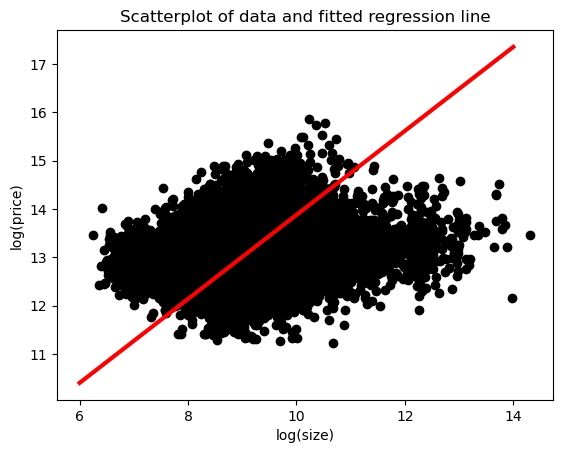

In [9]:

if __name__ == '__main__':
    # initial slope and intercept
    intercept = tf.Variable(0.1)
    slope = tf.Variable(0.5)
    
    # perform linear regression
    linreg = optimisation(intercept, slope)
    
    # plot linear regression results
    plot_results(intercept, slope)